In [319]:
import cv2
from pathlib import Path
import numpy as np
import os
from glob import glob
import natsort
import matplotlib.pyplot as plt

In [326]:
def extract_hair(img):
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    clip_limit = 1.0 
    tile_size = 10
    CLAHE = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size,tile_size))
    img_CLAHE = CLAHE.apply(img_grayscale)

    kernel_size = 5
    averaged_image = cv2.blur(img_grayscale, (kernel_size, kernel_size))

    hair_mask = img_CLAHE - averaged_image

    _ , thr_img = cv2.threshold(hair_mask, 0 ,255, cv2.THRESH_OTSU)

    p = 3
    structElemOpening = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (p, p))
    img_opening = cv2.morphologyEx(thr_img, cv2.MORPH_OPEN, structElemOpening)
    
    inpainted_img = cv2.inpaint(img, img_opening, inpaintRadius=10, flags=cv2.INPAINT_NS)

    return inpainted_img

In [327]:
ROOT_PATH = Path(Path(os.getcwd())/"../challenge1")
TRAIN_PATH = ROOT_PATH/"train"
VAL_PATH = ROOT_PATH/"val"

train_nevus = sorted(glob(str(TRAIN_PATH/'nevus/*')))
train_others = sorted(glob(str(TRAIN_PATH/'others/*')))

In [347]:
img = cv2.imread(train_nevus[7])

img_extractedHair = extract_hair(img)

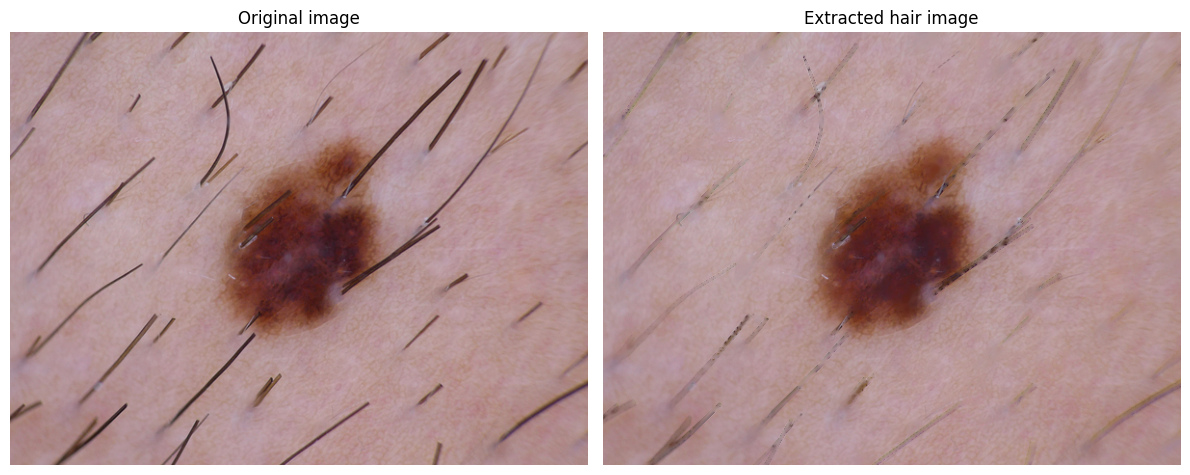

In [348]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.axis('off')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_extractedHair, cv2.COLOR_BGR2RGB))
plt.title('Extracted hair image')
plt.axis('off')
plt.tight_layout()

### From here to the end is the step by step pipeline to see the intermediate results and parameter tuning

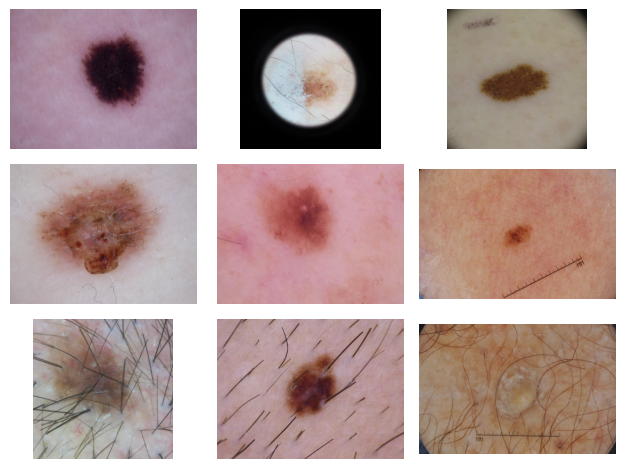

In [265]:
#plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(train_nevus[i])
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()

(-0.5, 599.5, 449.5, -0.5)

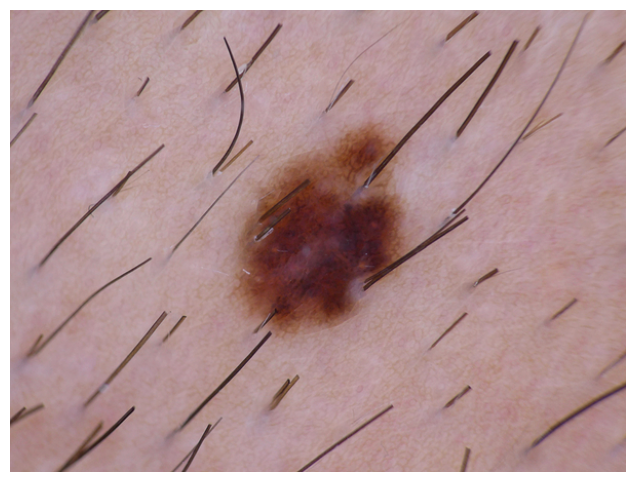

In [270]:
plt.figure(figsize=(12, 6))
img = cv2.imread(train_nevus[7])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 599.5, 449.5, -0.5)

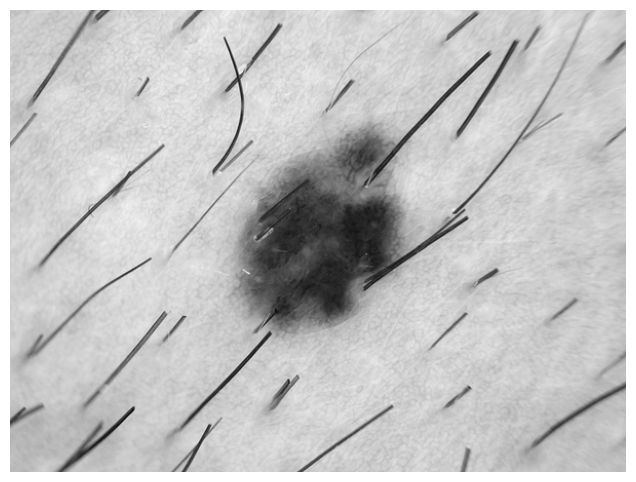

In [271]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
plt.imshow(img_grayscale, cmap='gray')
plt.axis('off')

(-0.5, 599.5, 449.5, -0.5)

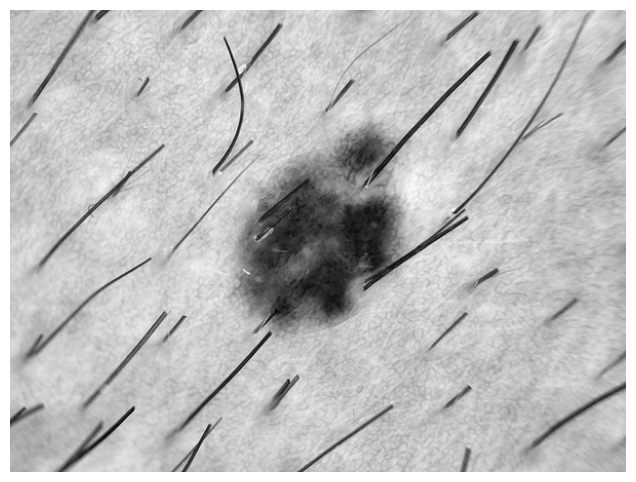

In [315]:
clip_limit = 1.0 # 10.0
tile_size = 10 # 6

#smoothed_image = cv2.blur(img_grayscale, (5, 5))
CLAHE = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(tile_size,tile_size))
img_CLAHE = CLAHE.apply(img_grayscale)

plt.figure(figsize=(12, 6))
plt.imshow(img_CLAHE, cmap='gray')
plt.axis('off')

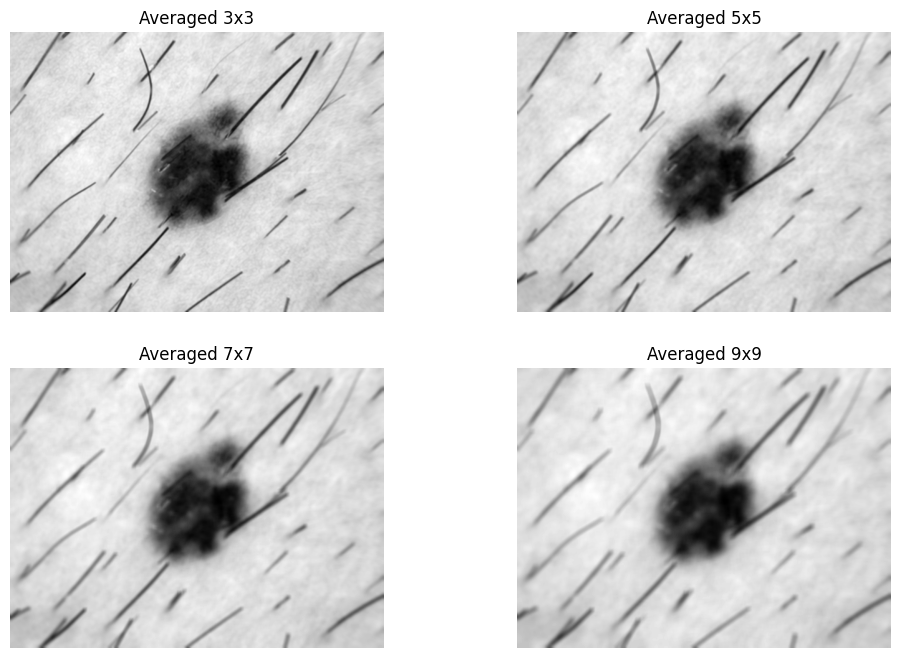

In [296]:
# Define kernel sizes for the average filters
kernel_sizes = [3, 5, 7, 9]


# Create an empty list to store the averaged images
averaged_images = []

# Apply average filters with different kernel sizes
for kernel_size in kernel_sizes:
    # Apply the average filter
    #averaged_image = cv2.blur(img_CLAHE, (kernel_size, kernel_size))
    averaged_image = cv2.blur(img_grayscale, (kernel_size, kernel_size))
    
    # Append the averaged image to the list
    averaged_images.append(averaged_image)


# Display the averaged images for different kernel sizes
plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(averaged_images[i], cmap='gray')
    plt.title(f'Averaged {kernel_size}x{kernel_size}')
    plt.axis('off')
    

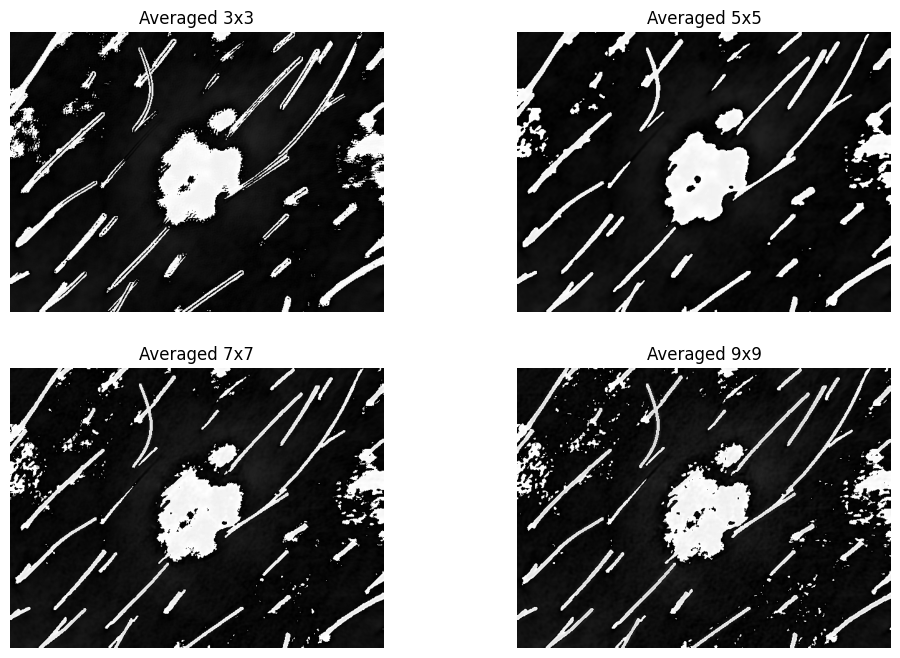

In [297]:
hair_masks = []
for i in range(len(kernel_sizes)):
    #hair_masks.append(averaged_images[i] - img_CLAHE)
    hair_masks.append(img_CLAHE - averaged_images[i])

plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(hair_masks[i], cmap='gray')
    plt.title(f'Averaged {kernel_size}x{kernel_size}')
    plt.axis('off')

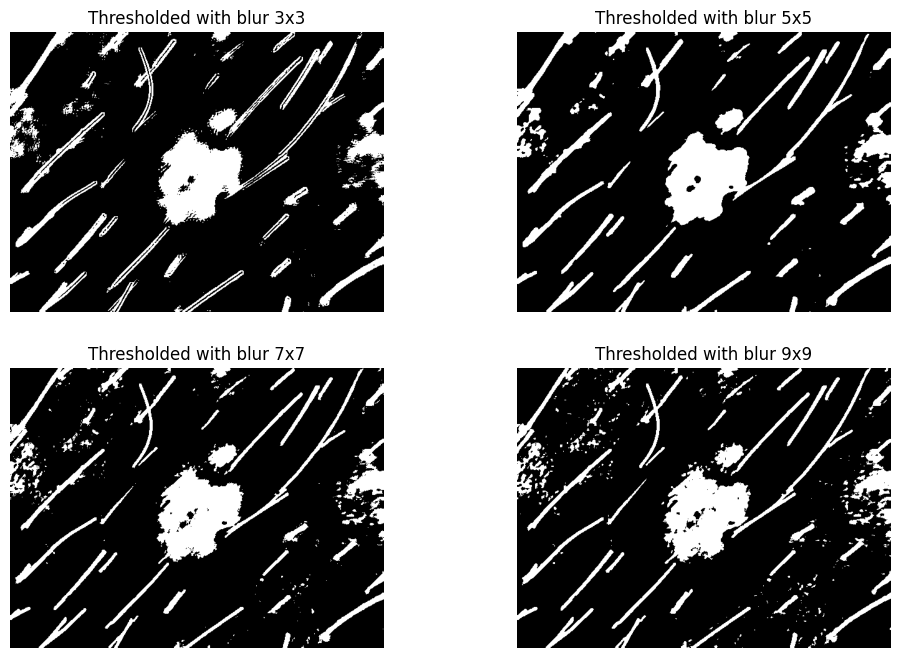

In [304]:
thresholded_imgs = []

for i in range(len(kernel_sizes)):
    _ , thr_img = cv2.threshold(hair_masks[i], 0 ,255, cv2.THRESH_OTSU)
    thresholded_imgs.append(thr_img)

plt.figure(figsize=(12, 8))
plt.tight_layout()
for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(2, 2, i+1)
    plt.imshow(thresholded_imgs[i], cmap='gray')
    plt.title(f'Thresholded with blur {kernel_size}x{kernel_size}')
    plt.axis('off')

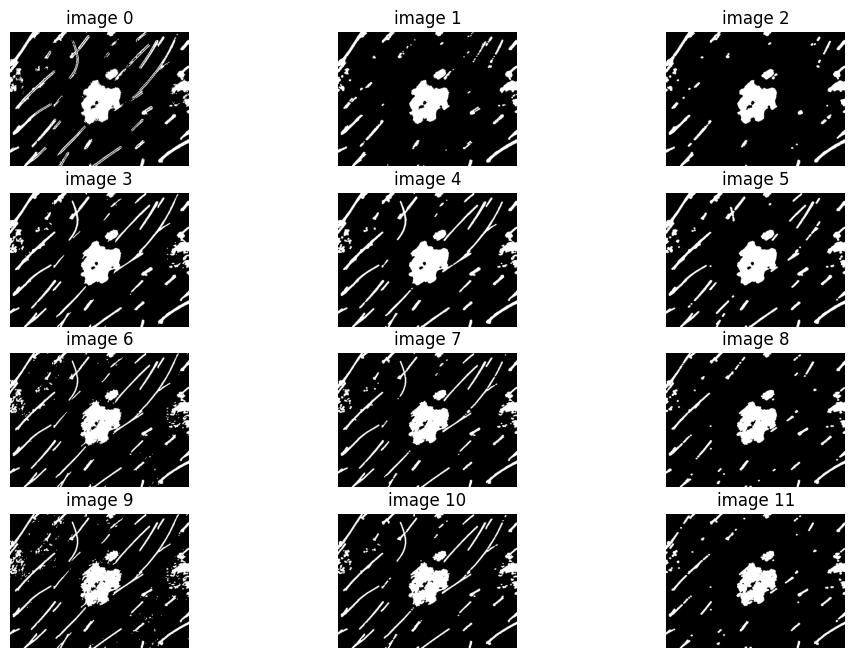

In [311]:
p_values = [3, 5, 7] #[10, 30, 50]
opening_images = []

for i in range(len(thresholded_imgs)):
    for j, p in enumerate(p_values):
        structElemOpening = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (p, p))
        img_opening = cv2.morphologyEx(thresholded_imgs[i], cv2.MORPH_OPEN, structElemOpening)
        opening_images.append(img_opening)


plt.figure(figsize=(12, 8))
plt.tight_layout()
for i in range(len(opening_images)):
    plt.subplot(4, 3, i+1)
    plt.imshow(opening_images[i], cmap='gray')
    plt.title(f'image {i}')
    plt.axis('off')

(-0.5, 599.5, 449.5, -0.5)

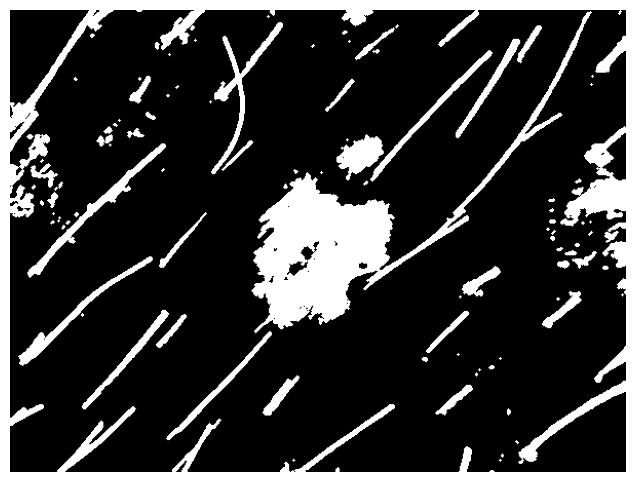

In [312]:
plt.figure(figsize=(12, 6))
plt.imshow(opening_images[6], cmap='gray')
plt.axis('off')

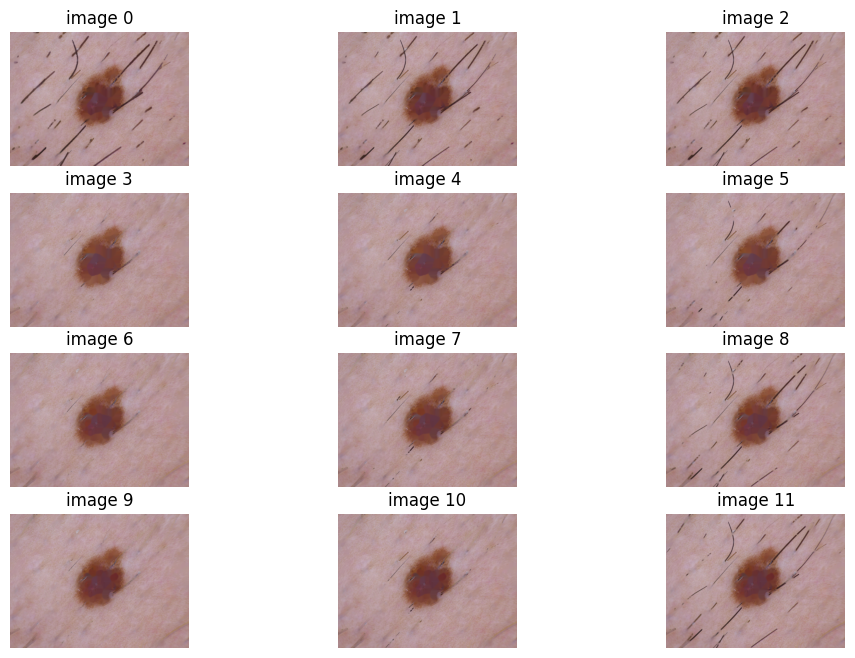

In [313]:
inpainted_imgs = []

for i in range(len(opening_images)):
    inpainted_img = cv2.inpaint(img, opening_images[i], inpaintRadius=10, flags=cv2.INPAINT_NS)
    inpainted_imgs.append(inpainted_img)


plt.figure(figsize=(12, 8))
plt.tight_layout()
for i in range(len(inpainted_imgs)):
    plt.subplot(4, 3, i+1)
    plt.imshow(cv2.cvtColor(inpainted_imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f'image {i}')
    plt.axis('off')


(-0.5, 599.5, 449.5, -0.5)

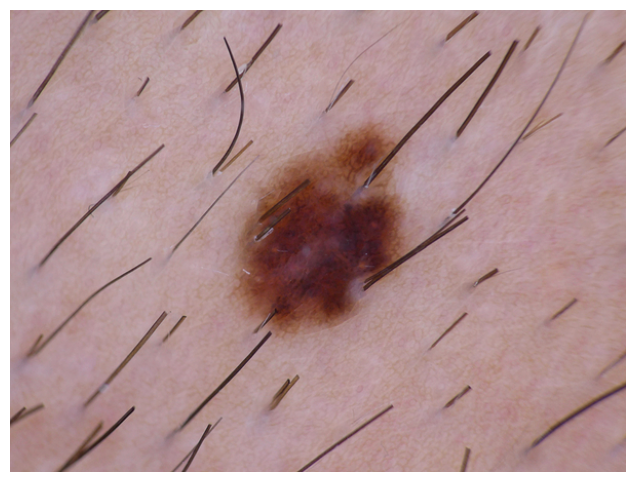

In [309]:
plt.figure(figsize=(12, 6))
img = cv2.imread(train_nevus[7])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')